#Bagging & Boosting KNN & Stacking
Assignment

1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?


-> The fundamental idea of ensemble techniques is to combine multiple models to improve prediction accuracy and consistency over a single model. Bagging and boosting differ in their approach: bagging builds models independently and in parallel using random data subsets to reduce variance, while boosting builds models sequentially, with each new model focusing on correcting the errors of the previous ones to reduce bias.

2.  Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.


-> Random Forests reduce overfitting compared to a single decision tree through an ensemble method known as bagging (Bootstrap Aggregating). A single decision tree can easily overfit by learning the training data, including its noise, too perfectly. Random Forests mitigate this by building multiple decision trees on different bootstrap samples of the training data and then aggregating their predictions (e.g., majority vote for classification, averaging for regression). This averaging process cancels out the noise and reduces the variance, leading to improved generalization performance on unseen data.
Two key hyperparameters that play a crucial role in this process are:
n_estimators: This hyperparameter controls the number of decision trees in the forest. A larger number of trees generally leads to more stable and accurate predictions, as the averaging effect becomes more pronounced, further reducing variance and overfitting.
max_features: This hyperparameter determines the maximum number of features considered when looking for the best split at each node of a decision tree. By randomly selecting a subset of features at each split, it introduces further randomness and decorrelates the individual trees, preventing them from all focusing on the same dominant features and thus reducing the overall model variance.

3.  What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.


-> Stacking, or stacked generalization, is an ensemble learning technique that combines the predictions of multiple diverse base models using a meta-learner. The base models are trained on the original dataset, and their predictions are then used as features to train a higher-level model, the meta-learner, which makes the final prediction.
How Stacking Differs from Traditional Bagging/Boosting:
Heterogeneity of Base Models: Stacking typically employs heterogeneous base models (e.g., decision trees, support vector machines, neural networks), leveraging the strengths of different learning algorithms. In contrast, bagging (like Random Forest) usually uses homogeneous base models (e.g., multiple decision trees), and boosting (like AdaBoost or Gradient Boosting) also often uses homogeneous weak learners.
Combination Method: Stacking uses a meta-learner to intelligently combine the predictions of the base models. This meta-learner learns how to best weigh and integrate the individual model outputs. Bagging methods typically combine predictions through simple averaging (for regression) or voting (for classification), while boosting sequentially builds models, each attempting to correct the errors of its predecessors.
Sequential vs. Parallel: Bagging trains base models in parallel and independently. Boosting trains models sequentially, with each new model focusing on the errors of the previous ones. Stacking involves training base models in parallel, but the meta-learner is trained on the outputs of these base models, representing a two-level learning process.
Simple Example Use Case:
Consider a classification problem, such as predicting whether a customer will churn.
Base Models: Train three different base models on the customer data: a Logistic Regression model, a Support Vector Machine, and a K-Nearest Neighbors model.
Generate Meta-Features: Each of these base models makes predictions on a holdout validation set (or through cross-validation). The predicted probabilities (or class labels) from these three models for each customer in the validation set become the "meta-features."
Meta-Learner: Train a new model, the meta-learner (e.g., a simple Logistic Regression or a small Neural Network), using these meta-features as input and the actual customer churn labels as the target.
Final Prediction: When a new customer's data arrives, the base models first predict the churn probability. These probabilities are then fed into the trained meta-learner, which outputs the final, refined prediction of customer churn.

4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?


-> The OOB (Out-of-Bag) score in a Random Forest is an internal, unbiased estimate of the model's performance on unseen data, calculated using the samples not used to train each individual tree. It is useful because it provides an accurate evaluation without needing a separate validation set, helping to prevent overfitting and simplify model training.
What the OOB Score is
An internal validation metric: The OOB score is a performance metric specific to Random Forests and other bagging algorithms.
Uses "out-of-bag" samples: For each tree, the bootstrap sample used for training typically omits about one-third of the original data. These omitted samples, called "out-of-bag" (OOB) samples, are used to make predictions for that specific tree.
An unbiased estimate: The score is computed by averaging the predictions made by all the trees that did not have that specific data point in their training set. This provides an unbiased estimate of the model's performance on new, unseen data.
How it helps model evaluation without a validation set
Eliminates the need for a validation set: By using the OOB samples for evaluation, you don't need to split your original training data into separate training and validation sets. This is particularly useful when you have limited data.
Provides an unbiased performance estimate: Because each OOB sample is predicted only by the trees that were trained on the other data, the score is a robust and unbiased measure of how well the model will generalize to new data.
Aids in model selection: The OOB score can help in selecting the optimal number of trees, tuning hyperparameters, and preventing overfitting. For example, you can monitor the OOB score as you increase the number of trees to find the point where performance plateaus.



5.  Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

-> AdaBoost and Gradient Boosting are both ensemble learning techniques that combine multiple weak learners to create a strong learner, but they differ in their approach to handling errors, adjusting weights, and typical use cases.
1. How they handle errors from weak learners:
AdaBoost: Focuses on misclassified samples. After each weak learner is trained, AdaBoost increases the weights of the misclassified samples, making them more influential in the training of the subsequent weak learner. This forces subsequent learners to pay more attention to the previously misclassified instances.
Gradient Boosting: Focuses on the residuals (errors) of the previous models. Each new weak learner is trained to predict the negative gradient of the loss function with respect to the current ensemble's predictions. In simpler terms, it tries to predict "how much" the previous model was wrong and correct that quantity.
2. Weight adjustment mechanism:
AdaBoost: Adjusts the weights of individual training samples. Misclassified samples receive higher weights, while correctly classified samples receive lower weights. Additionally, each weak learner is assigned a weight in the final ensemble based on its accuracy. More accurate learners have a greater influence on the final prediction.
Gradient Boosting: Does not directly adjust sample weights in the same way as AdaBoost. Instead, it sequentially builds new weak learners by fitting them to the residuals (errors) of the previous ensemble. The contribution of each new learner is scaled by a learning rate, which controls the step size in the direction of the negative gradient, effectively adjusting the "weight" of its correction.
3. Typical use cases:
AdaBoost: Primarily used for classification tasks, especially with simple weak learners like decision stumps (decision trees with a single split). It is known for its ability to handle noisy data and its resistance to overfitting when used with weak learners. Common applications include face detection and text categorization.
Gradient Boosting: More versatile and can be used for both classification and regression tasks. It typically uses deeper decision trees as weak learners and can achieve high accuracy, especially when tuned properly. Popular in various domains, including predictive analytics, recommendation systems, and ranking problems. Algorithms like XGBoost, LightGBM, and CatBoost are highly optimized implementations of gradient boosting.

6. :Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.


-> CatBoost, short for "Categorical Boosting," excels with categorical features due to its specialized internal handling mechanisms that reduce the need for extensive preprocessing.
Handling of Categorical Variables in CatBoost:
Ordered Target Encoding (Permutation-Driven Encoding): CatBoost employs a technique called Ordered Target Encoding to convert categorical features into numerical ones. This method addresses the "target leakage" problem often associated with traditional target encoding.
Instead of calculating target statistics (e.g., mean target value) for a category using the entire dataset, CatBoost randomly permutes the data.
For each data point, the categorical feature is replaced by a numerical value derived from the target statistics of previous data points in that specific permutation. This ensures that the model does not "see" future target values when encoding a category, preventing overfitting and improving generalization.
This process is repeated multiple times with different permutations, and the final encoding is an average of these results, further enhancing robustness.
Feature Combination: CatBoost can automatically combine categorical features to create new, more informative features, capturing complex interactions within the data without requiring manual engineering.
One-Hot Encoding (for low-cardinality features): For categorical features with a small number of unique values (low cardinality), CatBoost can still utilize one-hot encoding, a simpler and effective method for representing these features numerically.
Why this reduces preprocessing:
These internal strategies eliminate the need for manual encoding techniques like one-hot encoding or label encoding, which are typically required for other gradient boosting algorithms. This saves significant time and effort in the data preparation phase and can lead to more robust models, especially when dealing with high-cardinality categorical features or complex interactions between them.

7.  KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Helper function to evaluate and print metrics
def evaluate_model(y_test, y_pred, name="Model"):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)
    return accuracy

# Task 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Dataset loaded. X shape: {X.shape}, y shape: {y.shape}")
print(f"Features: {feature_names}")
print(f"Target names: {target_names}\n")

# Task 2: Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Data split into 70% train and 30% test.")
print(f"Train shapes: {X_train.shape}, {y_train.shape}")
print(f"Test shapes: {X_test.shape}, {y_test.shape}\n")

# Task 3: Train a KNN classifier without scaling (default K=5) and evaluate
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = evaluate_model(y_test, y_pred_unscaled, "Unscaled KNN (K=5)")

# Task 4: Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Transform testing data

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = evaluate_model(y_test, y_pred_scaled, "Scaled KNN (K=5)")

# Task 5: Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
# We use the scaled data for GridSearch as scaling generally improves KNN performance
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan']
}
knn_gs = KNeighborsClassifier()
grid_search = GridSearchCV(knn_gs, param_grid, cv=5, scoring='accuracy') # Use cross-validation
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
best_score_gs = grid_search.best_score_
print(f"Best K found by GridSearchCV: {best_k}")
print(f"Best distance metric found by GridSearchCV: {best_metric}")
print(f"Best cross-validation accuracy: {best_score_gs:.4f}\n")

# Task 6: Train the optimized KNN and compare results
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = knn_optimized.predict(X_test_scaled)
acc_optimized = evaluate_model(y_test, y_pred_optimized, "Optimized Scaled KNN")

# Summary Comparison
print("--- Model Comparison Summary (Accuracy on Test Set) ---")
print(f"Unscaled KNN (K=5): {acc_unscaled:.4f}")
print(f"Scaled KNN (K=5): {acc_scaled:.4f}")
print(f"Optimized Scaled KNN: {acc_optimized:.4f}")


Dataset loaded. X shape: (178, 13), y shape: (178,)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']

Data split into 70% train and 30% test.
Train shapes: (124, 13), (124,)
Test shapes: (54, 13), (54,)

--- Unscaled KNN (K=5) Results ---
Accuracy: 0.7222
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

------------------------------
--- Scaled KNN (K=5) Results ---
Accuracy: 0.9444
Classification Report:
              preci

8. : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


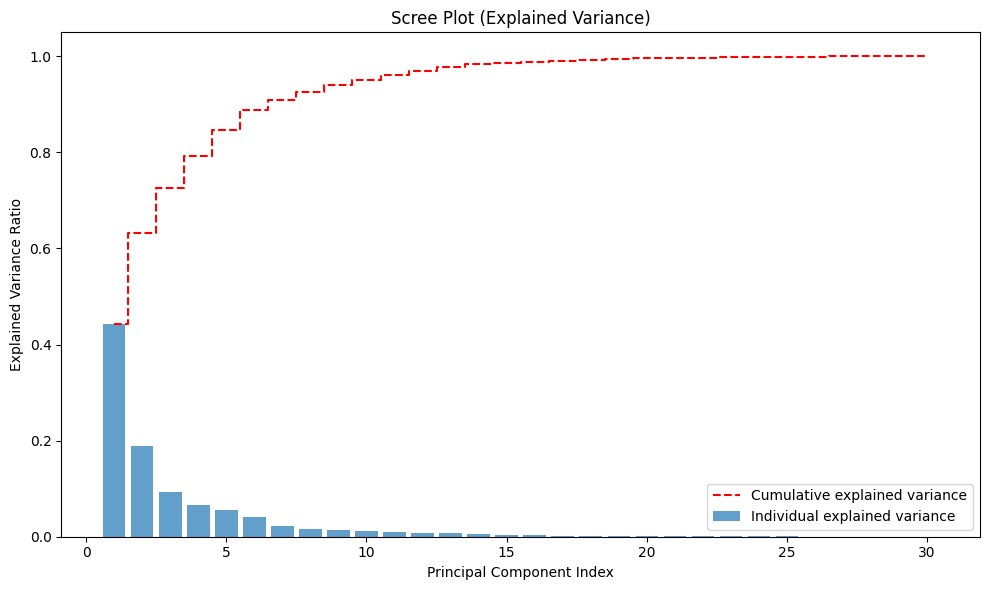

Original number of features: 30
Number of features after PCA (95% variance): 10

Accuracy of KNN on original data: 0.9591
Accuracy of KNN on PCA-transformed data: 0.9649


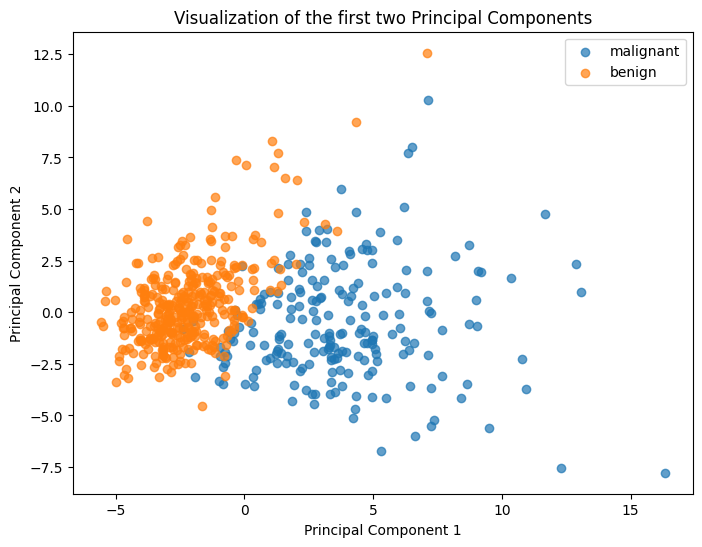

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Standardize the data (essential for PCA and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot the scree plot (explained variance ratio)
# Fit PCA with all components to analyze variance
pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance', color='red', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot (Explained Variance)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 3. Retain 95% variance and transform the dataset
# Find the number of components to retain 95% variance
# Scikit-learn PCA automatically finds this if n_components is set to a float between 0 and 1
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after PCA (95% variance): {X_pca.shape[1]}")

# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy
# Split data into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nAccuracy of KNN on original data: {accuracy_orig:.4f}")
print(f"Accuracy of KNN on PCA-transformed data: {accuracy_pca:.4f}")

# 5. Visualize the first two principal components using a scatter plot (color by class)
# Need to fit PCA with exactly 2 components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
# Scatter plot, colored by the target class
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca_2d[y == i, 0], X_pca_2d[y == i, 1], label=target_name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of the first two Principal Components')
plt.legend()
plt.show()


9. :KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff

MSE with Euclidean distance (K=5): 4600.79
MSE with Manhattan distance (K=5): 5425.15


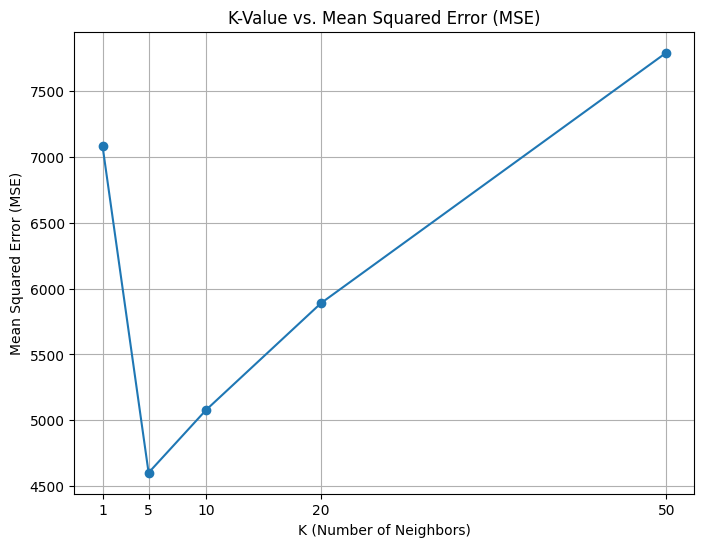

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train KNN regressors with different distance metrics (K=5)
# a. Euclidean distance (p=2 for Minkowski)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance (p=1 for Minkowski)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# c. Compare Mean Squared Error (MSE) for both
print(f"MSE with Euclidean distance (K=5): {mse_euclidean:.2f}")
print(f"MSE with Manhattan distance (K=5): {mse_manhattan:.2f}")

# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs. MSE to analyze bias-variance tradeoff
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o')
plt.title('K-Value vs. Mean Squared Error (MSE)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(k_values)
plt.show()